In [3]:
#MT05 -- aceitar strings que contenham 0s e um número par de 1s

class TuringMachine:
    def __init__(self, tape, transitions, start_state, accept_state, reject_state):
        self.tape = list(tape) + ['_']  # Adiciona espaço em branco no final da fita
        self.head = 0  # Cabeçote começa na posição inicial
        self.state = start_state
        self.transitions = transitions
        self.accept_state = accept_state
        self.reject_state = reject_state

    def step(self):
        char = self.tape[self.head]
        key = (self.state, char)

        if key in self.transitions:
            next_state, write_char, move = self.transitions[key]
            self.tape[self.head] = write_char  # Escreve na fita (opcional aqui)
            self.state = next_state  # Atualiza o estado

            # Move o cabeçote
            if move == 'R':
                self.head += 1
            elif move == 'L':
                self.head -= 1
            return True
        return False  # Não há mais transições possíveis

    def run(self):
        while self.state != self.accept_state and self.state != self.reject_state:
            if not self.step():
                break
        return self.state == self.accept_state  # Verifica se terminou no estado de aceitação


# Configuração da Máquina de Turing
tape = "11"  # Entrada (mude para testar outras strings)
start_state = 'q0'
accept_state = 'qa'
reject_state = 'qr'

# Tabela de transições: (estado atual, símbolo lido) -> (próximo estado, símbolo escrito, movimento)
transitions = {
    # Estado q0: procura por 1
    ('q0', '1'): ('q1', '1', 'R'),  # Encontra um 1, vai para q1
    ('q0', '0'): ('q0', '0', 'R'),  # Ignora 0
    ('q0', '_'): ('qa', '_', 'R'),  # Aceita se terminar com número par de 1s (fita vazia)

    # Estado q1: procura pelo próximo 1
    ('q1', '1'): ('q0', '1', 'R'),  # Encontra outro 1, volta para q0
    ('q1', '0'): ('q1', '0', 'R'),  # Ignora 0
    ('q1', '_'): ('qr', '_', 'R'),  # Rejeita se terminar com número ímpar de 1s

}

# Criar e executar a Máquina de Turing
tm = TuringMachine(tape, transitions, start_state, accept_state, reject_state)
result = tm.run()

# Exibe o resultado
if result:
    print(f"A entrada '{tape}' foi ACEITA pela Máquina de Turing!")
else:
    print(f"A entrada '{tape}' foi REJEITADA pela Máquina de Turing!")


A entrada '11' foi ACEITA pela Máquina de Turing!


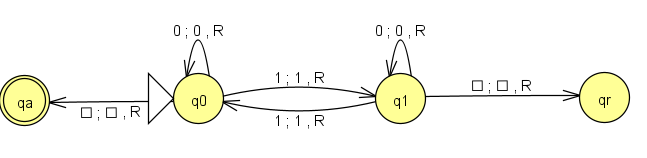